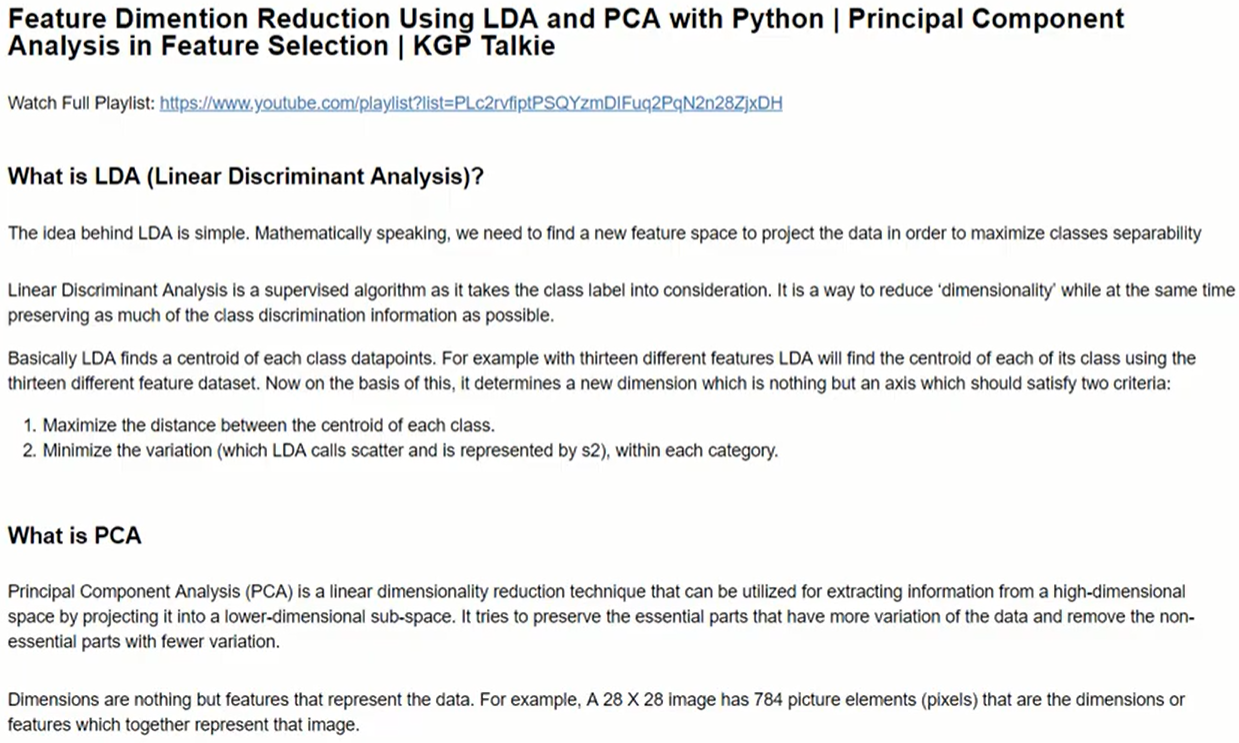

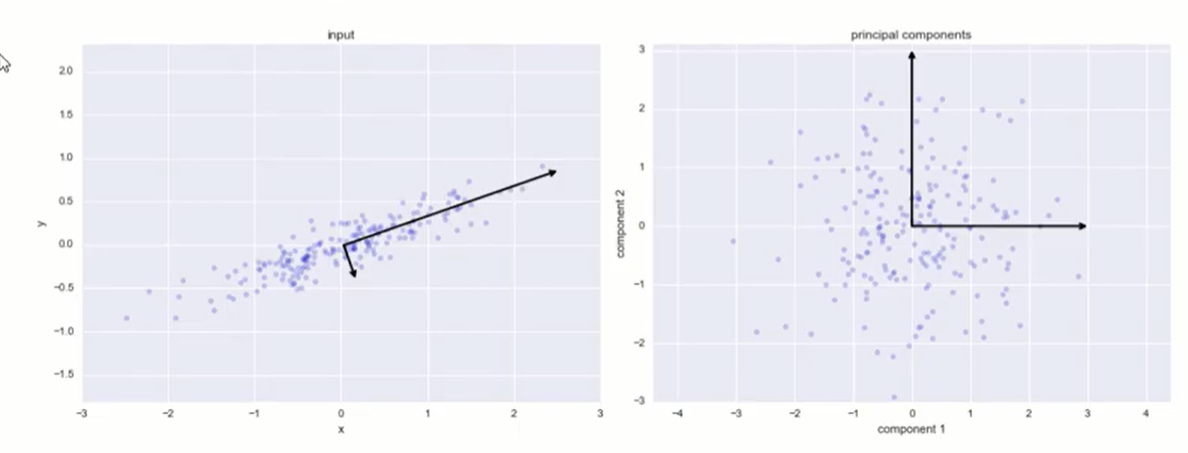

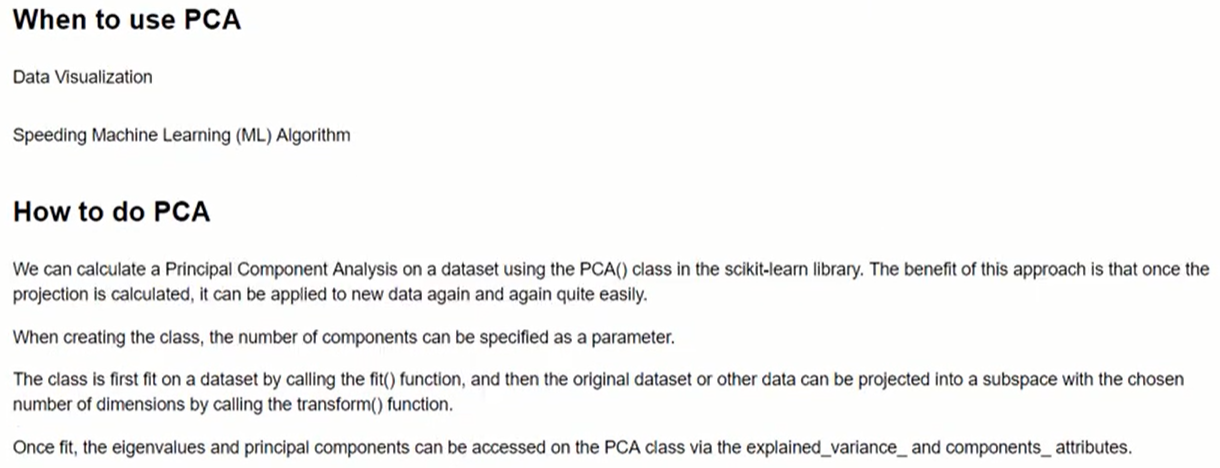

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('C:/Users/dell/Downloads/Data-Files-for-Feature-Selection-master/Data-Files-for-Feature-Selection-master/santander-train.csv', nrows=20000)

In [4]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']
X.shape, y.shape

((20000, 370), (20000,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Constant, Quasi constant and Duplicate removals Feature removal

In [7]:
constant_filter = VarianceThreshold(threshold = 0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [8]:
constant_filter.get_support().sum() # Non constant features after removing constant features

291

In [9]:
constant_list = [not temp for temp in constant_filter.get_support()]
X.columns[constant_list] # List of constant features removed from dataset

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [10]:
## Apply transform on training dataset to avoid overfitting and to remove constant features
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [11]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((16000, 291), (4000, 291), (16000, 370))

In [12]:
# Quasi constant features removal
quasi_constant_filter = VarianceThreshold(threshold = 0.01)
# We are using updated dataset after removing constant features
quasi_constant_filter.fit(X_train_filter) 

VarianceThreshold(threshold=0.01)

In [13]:
quasi_constant_filter.get_support().sum() # We removed 291-245 = 45 features

245

In [14]:
## Apply transform on training dataset to avoid overfitting and to remove constant features
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

In [15]:
X_train_quasi_filter.shape, X_test_quasi_filter.shape, X_train_filter.shape

((16000, 245), (4000, 245), (16000, 291))

In [16]:
## Duplicate features removal
# Transpose(T) the latest dataset -> convert to nparray
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [17]:
# COnvert nparray to pandas dataframe
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [18]:
X_train_T.shape, X_test_T.shape # rows changed to columns and vice versa

((245, 16000), (245, 4000))

In [19]:
# Check no of duplicate features
X_train_T.duplicated().sum()

18

In [20]:
duplicated_features = X_train_T.duplicated() # get duplicated features
features_to_keep = [not index for index in duplicated_features] # get not duplicated features

In [21]:
# Reverse transpose the features data
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [22]:
X_train_unique.shape, X_test_unique.shape, X_train_quasi_filter.shape, X_test_quasi_filter.shape

((16000, 227), (4000, 227), (16000, 245), (4000, 245))

In [23]:
X_train_unique.shape, X_train.shape

((16000, 227), (16000, 370))

In [25]:
# Remove features based on correlation
corrmat = X_test_unique.corr()

In [26]:
# define threshlod after which the features are removed
def get_correlation(data, threshold):
    corr_col = set() # taken set so features not get repeated
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])>threshold:
                column_name = corrmat.columns[i]
                corr_col.add(column_name)
    return corr_col

In [27]:
corr_features = get_correlation(X_train_unique, 0.85)
len(corr_features) # Features correlated 

124

In [28]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis=1)
X_test_uncorr = X_test_unique.drop(labels=corr_features, axis=1)

In [29]:
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 103), (4000, 103))

## 1. LDA Method

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [32]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_uncorr, y_train)
X_test_lda = lda.transform(X_test_uncorr)

In [34]:
X_train_lda.shape, X_test_lda.shape

((16000, 1), (4000, 1))

In [35]:
# Randomforestclassifier function
def run_random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on test set")
    print(accuracy_score(y_test, y_pred))

In [36]:
# Call random forest on cleaned selected features dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train_lda, X_test_lda, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

  

Accuracy on test set
0.924
Time: 2.94972562789917


In [37]:
# Call random forest on origional dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train, X_test, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy on test set
0.9585
Time: 4.630238056182861


## 2. PCA Method

In [38]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2, random_state=42) # n_components = 1,2--79
pca.fit(X_test_uncorr)
X_train_pca = pca.fit_transform(X_train_uncorr)
X_test_pca = pca.transform(X_test_uncorr)

In [41]:
X_train_pca.shape, X_test_pca.shape

((16000, 2), (4000, 2))

In [42]:
# Call random forest on cleaned selected features dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train_pca, X_test_pca, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

  

Accuracy on test set
0.95925
Time: 1.774848222732544


In [43]:
# Call random forest on origional dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train, X_test, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy on test set
0.9585
Time: 4.206884145736694


In [ ]:
# Check for n_components upto 78
for component in range(1, 79):
    pca = PCA(n_components=component, random_state=42)
    pca.fit(X_test_uncorr)
    X_train_pca = pca.fit_transform(X_train_uncorr)
    X_test_pca = pca.transform(X_test_uncorr)
    print("Selcted Components:", component)
    run_random_forest(X_train_pca, X_test_pca, y_train, y_test)

Selcted Components: 1
Accuracy on test set
0.95925
Selcted Components: 2
Accuracy on test set
0.95925
Selcted Components: 3
Accuracy on test set
0.95925
Selcted Components: 4
Accuracy on test set
0.959
Selcted Components: 5
Accuracy on test set
0.959
Selcted Components: 6
Accuracy on test set
0.9235
Selcted Components: 7
Accuracy on test set
0.924
Selcted Components: 8
Accuracy on test set
0.92575
Selcted Components: 9
Accuracy on test set
0.95425
Selcted Components: 10
Accuracy on test set
0.95575
Selcted Components: 11
Accuracy on test set
0.9555
Selcted Components: 12
Accuracy on test set
0.9565
Selcted Components: 13
Accuracy on test set
0.956
Selcted Components: 14
Accuracy on test set
0.9565
Selcted Components: 15
Accuracy on test set
0.9565
Selcted Components: 16
Accuracy on test set
0.95675
Selcted Components: 17
Accuracy on test set
0.957
Selcted Components: 18
Accuracy on test set
0.9565
Selcted Components: 19
Accuracy on test set
0.95625
Selcted Components: 20
Accuracy on te